/Users/mac/Desktop/Programming/nilm/valuation.py:60: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_df = df.resample('T').interpolate(method='linear')


Selected features (PCA-based):
Principal Component 1
Principal Component 2
Principal Component 3
Principal Component 4
Principal Component 5
Principal Component 6
Max cluster:10
Repeats:50
Weights:μ1,σ0
---------------


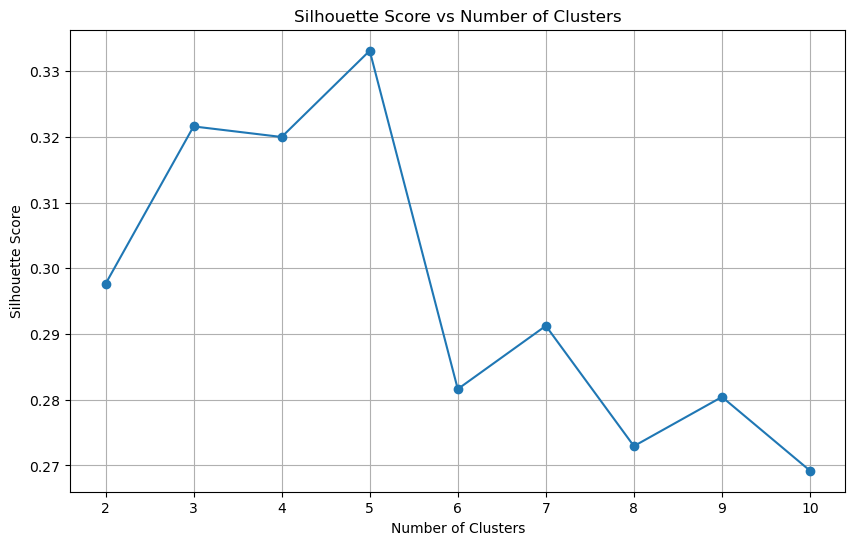

best_n_clusters: 5, score: 0.333113742273452


In [2]:
import pandas as pd
import valuation as val
import numpy as np
from pyEnergy.composition.composition import Composer
from pyEnergy.fool import Fool
df_val = val.get_val_data()


path = "data/ChangErZhai-40-139079-values 20180101-20181031.csv"
fool = Fool(path).select(method='pca', threshold=0.3, n_components=6)
from pyEnergy.clusters.HAC import HAC
y_pred = HAC(fool).fit()
composer = Composer(fool, y_pred, threshold=1)
composer.set_param('realP_B')
composer.set_reducer('my')


In [8]:
n_signal = np.unique(y_pred).size

In [ ]:
df_pred = [pd.DataFrame({'UTC Time':[], 'workingPower':[]}) for i in range(n_signal)]
mse = []
for j in range(0, 1):
    composer.compose(index=j)
    div_signals = [pd.DataFrame(composer.pred_signal[i], columns=['workingPower'], index=composer.x_values) for i in range(n_signal)]
    
    for i in range(n_signal):
        # 确保 div_signals[i] 包含所需的列
        if 'UTC Time' not in div_signals[i].columns:
            div_signals[i]['UTC Time'] = pd.to_datetime(composer.x_values)  # 假设 composer.x_values 是时间戳
        
        # 检查 df_pred[i] 是否为空
        if df_pred[i].empty:
            df_pred[i] = div_signals[i]
        else:
            # 确保 df_pred[i] 包含所需的列
            if 'UTC Time' not in df_pred[i].columns:
                df_pred[i]['UTC Time'] = pd.to_datetime(df_pred[i].index)
            
            # 合并前排除空条目
            df_pred[i] = pd.concat([df_pred[i], div_signals[i].set_index('UTC Time')]).drop_duplicates(subset='UTC Time')
# print(rmse)

In [12]:
df_pred

[                     workingPower            UTC Time
 T                                                    
 2018-02-28 03:19:00      0.000000 2018-02-28 03:19:00
 2018-02-28 03:21:00      0.000000 2018-02-28 03:21:00
 2018-02-28 03:23:00      0.000000 2018-02-28 03:23:00
 2018-02-28 03:27:00      0.000000 2018-02-28 03:27:00
 2018-02-28 03:29:00      0.000000 2018-02-28 03:29:00
 ...                           ...                 ...
 2018-02-28 05:35:00      3.872768 2018-02-28 05:35:00
 2018-02-28 05:36:00      3.872768 2018-02-28 05:36:00
 2018-02-28 05:38:00      3.872768 2018-02-28 05:38:00
 2018-02-28 05:40:00      3.872768 2018-02-28 05:40:00
 2018-02-28 05:42:00      3.872768 2018-02-28 05:42:00
 
 [76 rows x 2 columns],
                      workingPower            UTC Time
 T                                                    
 2018-02-28 03:19:00           0.0 2018-02-28 03:19:00
 2018-02-28 03:21:00           0.0 2018-02-28 03:21:00
 2018-02-28 03:23:00           0.0 2018

In [10]:
mse = [val.get_rmse(df_val=df_val, df_pred=df_pred[i]) for i in range(n_signal)]

In [11]:
mse

[nan, nan, nan, nan, nan]